<a href="https://colab.research.google.com/github/katoyu/image-processing-100training/blob/master/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF31_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_31_40/imori_gray.jpg
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_31_40/imori.jpg
  
from google.colab.patches import cv2_imshow

--2019-04-18 14:38:32--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_31_40/imori_gray.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8973 (8.8K) [image/jpeg]
Saving to: ‘imori_gray.jpg’

imori_gray.jpg      100%[===================>]   8.76K  --.-KB/s    in 0s      

2019-04-18 14:38:32 (75.3 MB/s) - ‘imori_gray.jpg’ saved [8973/8973]

--2019-04-18 14:38:33--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_31_40/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 

#31 アフィン変換(スキュー)

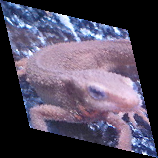

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

_img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = _img.shape

dx = 30.
dy = 30.
a = 1.
b = dx/H
c = dy/W
d = 1.
tx = 0.
ty = 0.

img = np.zeros((H+2, W+2, C), dtype=np.float32)
img[1:H+1, 1:W+1] = _img

H_new = np.ceil(dy + H).astype(np.int)
W_new = np.ceil(dx + W).astype(np.int)
out = np.zeros((H_new, W_new, C), dtype=np.float32)

x_new = np.tile(np.arange(W_new), (H_new, 1))
y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

adbc = a * d - b * c
x = np.round((d * x_new - b * y_new) / adbc).astype(np.int) - tx + 1
y  =np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1

x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)

out[y_new, x_new] = img[y, x]
out = out.astype(np.uint8)

cv2_imshow(out)

#32

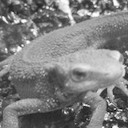

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

#DFT
K = W
L = H
M = W
N = H

G = np.zeros((L, K), dtype=np.complex)

x = np.tile(np.arange(W), (H, 1))
y = np.arange(H).repeat(W).reshape(H, -1)

for l in range(L):
  for k in range(K):
    G[l, k] = np.sum( gray * np.exp( -2j * np.pi  * (k * x / M + l * y / N ) ) )/ np.sqrt(M * N)
    
ps = (np.abs(G) / np.abs(G).max() * 255 ).astype(np.uint8)
cv2.imwrite("out_ps.jpg", ps)

#IDFT
out = np.zeros((H, W), dtype=np.float32 )

for n in range(N):
  for m in range(M):
    out[n, m] = np.abs(np.sum(G * np.exp(2j * np.pi * (x * m / M + y * n / N)))) / np.sqrt(M * N)
    
out[out > 255] = 255
out = out.astype(np.uint8)

cv2_imshow(out)

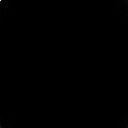

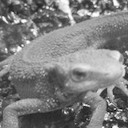

True

In [5]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

# Gray scale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

"""
fimg = np.fft.fft2(gray)
    
# 第1象限と第3象限, 第2象限と第4象限を入れ替え
fimg =  np.fft.fftshift(fimg)
print(fimg.shape)
# パワースペクトルの計算
mag = 20*np.log(np.abs(fimg))
    
# 入力画像とスペクトル画像をグラフ描画
plt.subplot(121)
plt.imshow(gray, cmap = 'gray')
plt.subplot(122)
plt.imshow(mag, cmap = 'gray')
plt.show()
"""

# DFT
K = W
L = H
M = W
N = H

G = np.zeros((L, K), dtype=np.complex)

x = np.tile(np.arange(W), (H, 1))
y = np.arange(H).repeat(W).reshape(H, -1)

for l in range(L):
    for k in range(K):
        G[l, k] = np.sum(gray * np.exp(-2j * np.pi * (x * k / M + y * l / N))) / np.sqrt(M * N)
        #for n in range(N):
        #    for m in range(M):
        #        v += gray[n, m] * np.exp(-2j * np.pi * (m * k / M + n * l / N))
        #G[l, k] = v / np.sqrt(M * N)

ps = (np.abs(G) / np.abs(G).max() * 255).astype(np.uint8)
cv2.imwrite("out_ps.jpg", ps)
cv2_imshow(ps)

# IDFT
out = np.zeros((H, W), dtype=np.float32)

for n in range(N):
    for m in range(M):
        out[n,m] = np.abs(np.sum(G * np.exp(2j * np.pi * (x * m / M + y * n / N)))) / np.sqrt(M * N)

out[out>255] = 255
out = out.astype(np.uint8)
    
# Save result
cv2_imshow(out)
cv2.imwrite("out.jpg", out)


#33


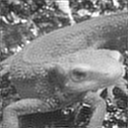

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0] 

# DFT
K = W
L = H
M = W
N = H

G = np.zeros((L, K), dtype=np.complex)

x = np.tile(np.arange(W), (H, 1))
y = np.arange(H).repeat(W).reshape(H, -1)

for l in range(L):
  for k in range(K):
    G[l, k] = np.sum(gray * np.exp(-2j * np.pi * (x*k/M + y*l/N ))) / np.sqrt(M*N)

_G = np.zeros_like(G)
_G[:H//2, :W//2] = G[H//2:, W//2:]
_G[:H//2, W//2:] = G[H//2:, :W//2]
_G[H//2:, :W//2] = G[:H//2, W//2:]
_G[H//2:, W//2:] = G[:H//2, :W//2]
p = 0.5
_x = x - W//2
_y = y - H//2
r = np.sqrt(_x **2+ _y **2)
mask = np.ones((H, W), dtype=np.float32)
mask[ r > (np.sqrt(((W//2)**2)+((H//2)**2))*p)] = 0

_G *= mask

G[:H//2, :W//2] = _G[H//2:, W//2:]
G[:H//2, W//2:] = _G[H//2:, :W//2]
G[H//2:, :W//2] = _G[:H//2, W//2:]
G[H//2:, W//2:] = _G[:H//2, :W//2]

#IDFT
out = np.zeros((H, W), dtype=np.float32)

for n in range(N):
  for m in range(M):
    out[n, m] = np.abs(np.sum(G * np.exp(2j * np.pi * (x * m / M + y * n / N)))) / np.sqrt(M * N)
    
out[out>255] = 255
out = out.astype(np.uint8)
cv2_imshow(out)

#34

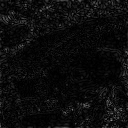

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0] 

# DFT
K = W
L = H
M = W
N = H

G = np.zeros((L, K), dtype=np.complex)

x = np.tile(np.arange(W), (H, 1))
y = np.arange(H).repeat(W).reshape(H, -1)

for l in range(L):
  for k in range(K):
    G[l, k] = np.sum(gray * np.exp(-2j * np.pi * (x*k/M + y*l/N ))) / np.sqrt(M*N)

_G = np.zeros_like(G)
_G[:H//2, :W//2] = G[H//2:, W//2:]
_G[:H//2, W//2:] = G[H//2:, :W//2]
_G[H//2:, :W//2] = G[:H//2, W//2:]
_G[H//2:, W//2:] = G[:H//2, :W//2]
p = 0.2
_x = x - W//2
_y = y - H//2
r = np.sqrt(_x **2+ _y **2)
mask = np.ones((H, W), dtype=np.float32)
mask[ r < (np.sqrt(((W//2)**2)+((H//2)**2))*p)] = 0

_G *= mask

G[:H//2, :W//2] = _G[H//2:, W//2:]
G[:H//2, W//2:] = _G[H//2:, :W//2]
G[H//2:, :W//2] = _G[:H//2, W//2:]
G[H//2:, W//2:] = _G[:H//2, :W//2]

#IDFT
out = np.zeros((H, W), dtype=np.float32)

for n in range(N):
  for m in range(M):
    out[n, m] = np.abs(np.sum(G * np.exp(2j * np.pi * (x * m / M + y * n / N)))) / np.sqrt(M * N)
    
out[out>255] = 255
out = out.astype(np.uint8)
cv2_imshow(out)

#35

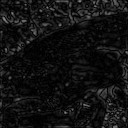

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0] 

# DFT
K = W
L = H
M = W
N = H

G = np.zeros((L, K), dtype=np.complex)

x = np.tile(np.arange(W), (H, 1))
y = np.arange(H).repeat(W).reshape(H, -1)

for l in range(L):
  for k in range(K):
    G[l, k] = np.sum(gray * np.exp(-2j * np.pi * (x*k/M + y*l/N ))) / np.sqrt(M*N)

_G = np.zeros_like(G)
_G[:H//2, :W//2] = G[H//2:, W//2:]
_G[:H//2, W//2:] = G[H//2:, :W//2]
_G[H//2:, :W//2] = G[:H//2, W//2:]
_G[H//2:, W//2:] = G[:H//2, :W//2]
p1 = 0.5
p2 = 0.1
_x = x - W//2
_y = y - H//2
r = np.sqrt(_x **2+ _y **2)
mask = np.ones((H, W), dtype=np.float32)
mask[ r > (np.sqrt(((W//2)**2)+((H//2)**2))*p1)] = 0
mask[ r < (np.sqrt(((W//2)**2)+((H//2)**2))*p2)] = 0

_G *= mask

G[:H//2, :W//2] = _G[H//2:, W//2:]
G[:H//2, W//2:] = _G[H//2:, :W//2]
G[H//2:, :W//2] = _G[:H//2, W//2:]
G[H//2:, W//2:] = _G[:H//2, :W//2]

#IDFT
out = np.zeros((H, W), dtype=np.float32)

for n in range(N):
  for m in range(M):
    out[n, m] = np.abs(np.sum(G * np.exp(2j * np.pi * (x * m / M + y * n / N)))) / np.sqrt(M * N)
    
out[out>255] = 255
out = out.astype(np.uint8)
cv2_imshow(out)

#36

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: ComplexWarning: Casting complex values to real discards the imaginary part


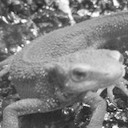

In [18]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

#DCT

T = 8
K = 8
X = np.zeros((H, W), dtype=np.complex)

def w(x, y, u, v):
    cu = 1.
    cv = 1.
    if u==0:
        cu /= np.sqrt(2)
    if v==0:
        cv /= np.sqrt(2)
    theta = np.pi / (2 * T)
    return ((2 * cu * cv / T) * np.cos((2*x+1) * u * theta) * np.cos((2*y+1)*v*theta))

for yi in range(0, H, T):
    for xi in range(0, W, T):
        for v in range(T):
            for u in range(T):
                for y in range(T):
                    for x in range(T):
                        X[v+yi, u+xi] += gray[y+yi, x+xi] * w(x,y,u,v)

#IDCT
out = np.zeros((H, W), dtype=np.float32)

for yi in range(0, H, T):
    for xi in range(0, W, T):
        for y in range(T):
            for x in range(T):
                for v in range(K):
                    for u in range(K):
                        out[y+yi, x+xi] += X[v+yi, u+xi] * w(x,y,u,v)
                        
out[out>255] = 255
out = np.round(out).astype(np.uint8)

cv2_imshow(out)

#37

PSNR =  27.61714124916368
bitrate =  2.0


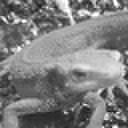

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg").astype(np.float32)

H, W, C = img.shape

gray = 0.2126 * img[..., 2] + 0.7152 *img[..., 1] + 0.0722 *img[..., 0]

#DCT
T = 8
K = 4
X = np.zeros((H, W), dtype=np.float64)

def w(x, y, u, v):
    cu = 1.
    cv = 1.
    if u==0:
        cu /= np.sqrt(2)
    if v==0:
        cv /= np.sqrt(2)
    theta = np.pi / (2 * T)
    return ((2 * cu * cv / T) * np.cos((2*x+1)*u*theta) * np.cos((2*y+1)*v*theta))

for yi in range(0, W, T):
    for xi in range(0, W, T):
        for v in range(T):
            for u in range(T):
                for y in range(T):
                    for x in range(T):
                        X[v+yi, u+xi] += gray[y+yi, x+xi] * w(x,y,u,v)
                        
#IDCT
out = np.zeros((H, W), dtype=np.float64)

for yi in range(0, W, T):
    for xi in range(0, W, T):
        for y in range(T):
            for x in range(T):
                for v in range(K):
                    for u in range(K):
                        out[y+yi, x+xi] += X[v+yi, u+xi] * w(x,y,u,v)
                        
out[255<out] = 255
out = np.floor(out).astype(np.uint8)

#MSE
v_max = 255.
mse = np.sum(np.power(np.abs(gray.astype(np.float32) - out.astype(np.float32)), 2)) / (H * W)
psnr = 10 * np.log10(v_max**2 / mse)
print("PSNR = ", psnr)
#bitrate
br = 1. * T * K**2 / T**2
print("bitrate = ", br)

cv2_imshow(out)

#38

PSNR =  52.72601262012958
bitrate =  8.0


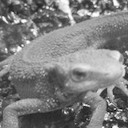

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg").astype(np.float32)

H, W, C = img.shape

gray = 0.2126 * img[..., 2] + 0.7152 *img[..., 1] + 0.0722 *img[..., 0]

#DCT
T = 8
K = 8
X = np.zeros((H, W), dtype=np.float64)
Q = np.array(((16, 11, 10, 16, 24, 40, 51, 61),
              (12, 12, 14, 19, 26, 58, 60, 55),
              (14, 13, 16, 24, 40, 57, 69, 56),
              (14, 17, 22, 29, 51, 87, 80, 62),
              (18, 22, 37, 56, 68, 109, 103, 77),
              (24, 35, 55, 64, 81, 104, 113, 92),
              (49, 64, 78, 87, 103, 121, 120, 101),
              (72, 92, 95, 98, 112, 100, 103, 99)), dtype=np.float32)

def w(x, y, u, v):
    cu = 1.
    cv = 1.
    if u==0:
        cu /= np.sqrt(2)
    if v==0:
        cv /= np.sqrt(2)
    theta = np.pi / (2 * T)
    return ((2 * cu * cv / T) * np.cos((2*x+1)*u*theta) * np.cos((2*y+1)*v*theta))

for yi in range(0, W, T):
    for xi in range(0, W, T):
        for v in range(T):
            for u in range(T):
                for y in range(T):
                    for x in range(T):
                        X[v+yi, u+xi] += gray[y+yi, x+xi] * w(x,y,u,v)
                        
#IDCT
out = np.zeros((H, W), dtype=np.float64)

for yi in range(0, W, T):
    for xi in range(0, W, T):
        for y in range(T):
            for x in range(T):
                for v in range(K):
                    for u in range(K):
                        out[y+yi, x+xi] += X[v+yi, u+xi] * w(x,y,u,v)
        X[yi:yi+T, xi:xi+T] = np.round(X[yi:yi+T, xi:xi+T]/ Q) * Q
                        
out[out>255] = 255
out = np.floor(out).astype(np.uint8)

#MSE
v_max = 255.
mse = np.sum(np.power(np.abs(gray.astype(np.float32) - out.astype(np.float32)), 2)) / (H * W)
psnr = 10 * np.log10(v_max**2/mse)
print("PSNR = ", psnr)

bitrate = 1. * T * K**2 / (T**2)
print("bitrate = ", bitrate)

cv2_imshow(out)

                        

#39

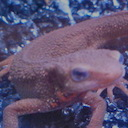

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

# GRB -> YCbCr
R = img[..., 2]
G = img[..., 1]
B = img[..., 0]

Y = 0.299 * R + 0.5870 * G + 0.114 * B
Cb = -0.1687 * R - 0.3313 * G + 0.5 * B + 128
Cr = 0.5 * R - 0.4187 * G - 0.0813 * B + 128

Y *= 0.7

#YCbCr ->GRB
out = np.zeros_like(img, dtype=np.float32)
out[..., 2] = Y + (Cr - 128) * 1.402
out[..., 1] = Y - (Cb - 128) * 0.3441 - (Cr - 128) * 0.7139
out[..., 0] = Y + (Cb - 128) * 1.7718

out[out>255] = 255
out[out<0] = 0

out = out.astype(np.uint8)
cv2_imshow(out)

#40

PSNR =  [  3.57445965   3.57445965 -12.7264275 ]
bitrate =  8.0


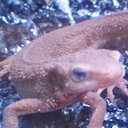

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

# GRB -> YCbCr
R = img[..., 2]
G = img[..., 1]
B = img[..., 0]

Y = 0.299 * R + 0.5870 * G + 0.114 * B
Cb = -0.1687 * R - 0.3313 * G + 0.5 * B + 128
Cr = 0.5 * R - 0.4187 * G - 0.0813 * B + 128

YCC = np.zeros_like(img, dtype=np.float32)
YCC[..., 0] = Y
YCC[..., 1] = Cb
YCC[..., 2] = Cr

#DCT
T = 8
K = 8
X = np.zeros((H,W,C), dtype=np.float64)

Q1 = np.array(((16, 11, 10, 16, 24, 40, 51, 61),
               (12, 12, 14, 19, 26, 58, 60, 55),
               (14, 13, 16, 24, 40, 57, 69, 56),
               (14, 17, 22, 29, 51, 87, 80, 62),
               (18, 22, 37, 56, 68, 109, 103, 77),
               (24, 35, 55, 64, 81, 104, 113, 92),
               (49, 64, 78, 87, 103, 121, 120, 101),
               (72, 92, 95, 98, 112, 100, 103, 99)), dtype=np.float32)

Q2 = np.array(((17, 18, 24, 47, 99, 99, 99, 99),
               (18, 21, 26, 66, 99, 99, 99, 99),
               (24, 26, 56, 99, 99, 99, 99, 99),
               (47, 66, 99, 99, 99, 99, 99, 99),
               (99, 99, 99, 99, 99, 99, 99, 99),
               (99, 99, 99, 99, 99, 99, 99, 99),
               (99, 99, 99, 99, 99, 99, 99, 99),
               (99, 99, 99, 99, 99, 99, 99, 99)), dtype=np.float32)

def w(x, y, u, v):
    cu = 1.
    cv = 1.
    if u==0:
        cu /= np.sqrt(2)
    if v==0:
        cv /= np.sqrt(2)
    theta = np.pi / (2 * T)
    return ((2 * cu * cv / T) * np.cos((2*x+1)*u*theta) * np.cos((2*y+1)*v*theta))

for yi in range(0, W, T):
    for xi in range(0, W, T):
        for v in range(T):
            for u in range(T):
                for y in range(T):
                    for x in range(T):
                        for c in range(C):
                            X[v+yi, u+xi, c] += YCC[y+yi, x+xi, c] * w(x,y,u,v)
                        
        X[yi:yi+T, xi:xi+T, 0] = np.round(X[yi:yi+T, xi:xi+T, 0]/ Q1) * Q1
        X[yi:yi+T, xi:xi+T, 1] = np.round(X[yi:yi+T, xi:xi+T, 1]/ Q2) * Q2
        X[yi:yi+T, xi:xi+T, 2] = np.round(X[yi:yi+T, xi:xi+T, 2]/ Q2) * Q2        
                        
#IDCT
IYCC = np.zeros((H, W, 3), dtype=np.float64)

for yi in range(0, W, T):
    for xi in range(0, W, T):
        for y in range(T):
            for x in range(T):
                for v in range(K):
                    for u in range(K):
                        IYCC[y+yi, x+xi] += X[v+yi, u+xi] * w(x,y,u,v)

#YCbCr ->GRB
out = np.zeros_like(img, dtype=np.float32)
out[..., 2] = IYCC[..., 0] + (IYCC[... ,2] - 128) * 1.402
out[..., 1] = IYCC[..., 0] - (IYCC[..., 1] - 128) * 0.3441 - (IYCC[..., 2] - 128) * 0.7139
out[..., 0] = IYCC[..., 0] + (IYCC[..., 1] - 128) * 1.7718

out[out>255] = 255
out = out.astype(np.uint8)

#MSE
v_max = 255.
mse = np.sum(np.power(np.abs(img.astype(np.float32) - out.astype(np.float32)),2)) / (H, W, C)
psnr = 10 * np.log10(v_max**2/mse)
print("PSNR = ", psnr)
bitrate = 1. * T * K**2 / (T**2)
print("bitrate = ", bitrate)

cv2_imshow(out)